In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def integrand(x: float) -> float:
    """被积函数
    """
    return 4 / (1 + x**2)


def trapezoidal_integral(a: float, b: float, N: int) -> float:
    """梯形积分

    Args:
        a (float): 积分下限
        b (float): 积分上限
        N (int): 积分区间等分数

    Returns:
        float: 积分结果

    Example:
        >>> trapezoidal_integral(0, 1, 1000)
    """
    x = np.linspace(a, b, N)
    y = integrand(x)
    return (2*np.sum(y) - y[0] - y[-1]) * (b-a) / 2 / (N-1)


def simpson_integral(a: float, b: float, N: int) -> float:
    """Simpson 积分

    Args:
        a (float): 积分下限
        b (float): 积分上限
        N (int): 积分区间等分数

    Returns:
        float: 积分结果

    Example:
        >>> simpson_integral(0, 1, 1000)
    """

    x = np.linspace(a, b, N)
    y = integrand(x)

    weights = [2 + i % 2*2 for i in range(N)]  # 权重
    if N % 2 == 1:
        weights[0] = weights[-1] = 1  # 当 N 为奇数时，权重为 [1,4,2,4,....2,4,1]
    else:
        weights[0] = 1
        weights[-2] = 5/2
        weights[-1] = 3/2  # 当 N 为偶数时，组后多出来的一小段用梯形积分补上

    return np.dot(y, weights) * (b-a) / 3 / (N-1)

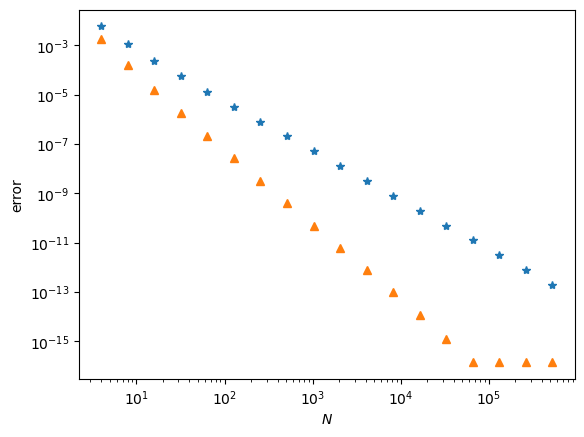

In [3]:
err_t = []  # 梯形积分误差
err_s = []  # Simpson 积分误差

Ns = [2**i for i in range(2, 20, 1)]

for N in Ns:
    I_t = trapezoidal_integral(a=0, b=1, N=N)
    err_t.append(abs(I_t - np.pi) / np.pi)

    I_s = simpson_integral(a=0, b=1, N=N)
    err_s.append(abs(I_s - np.pi) / np.pi)

plt.plot(Ns, err_t, '*')
plt.plot(Ns, err_s, '^')
plt.xlabel(f'$N$')
plt.ylabel('error')
plt.yscale('log')
plt.xscale('log')